In [1]:
using Arpack
using LinearAlgebra
using CairoMakie
using LaTeXStrings
using Statistics
using Revise
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Lattice_setup/lattice_BZ.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/patch_methods.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Spinors/trithep_spinors.jl")

mbi_analytic_origin_3pbc (generic function with 1 method)

In [2]:
# lattice parameters
pd = 50
kappa = 1
m_kappa = 10^(-1) * kappa
w = 10^(-1) * m_kappa

0.010000000000000002

In [3]:
# MBI parameters
B = -2

-2

In [4]:
# 3-Patch parameters
vF = 0
delta = -1

-1

<font size="12">Spacing Convergence</font>

In [5]:
function spacing_conv(w, pd, B)
    n_pts = 10^3
    spinor_labels = ["MBI"]
    geometric_quants = Array{Float64}(undef, length(spinor_labels), 3, n_pts)

    x = 10^(-16)
    y = 10^(-16)
    grid = reshape([x, y], (1, 2))
    P = Figure(size=(1500, 1200), fontsize=30, fonts = (; regular = "italic", weird = "bold"))

    spacings = Array{Float64}(undef, length(spinor_labels), n_pts)
    spacings[1, :] = range(-2, 3, n_pts)

    exps = Array{Float64}(undef, length(spinor_labels), n_pts)
    for j in 1:length(spinor_labels)
        exps[j, :] = 10 .^spacings[j, :]
    end

    for i in 1:n_pts
         spacing = (w / 2 / pd) / exps[1, i]
 
         geometric_quants[1, 1, i] = mbi_spinor_bc(grid, spacing, B)[1]
         geometric_quants[1, 2, i] = mbi_analytic_bc(B)
    end

    for j in 1:length(spinor_labels)
        major_ax1 = Axis(P[:, j], title = spinor_labels[j], titlegap = 120, titlefont = :weird, titlesize = 50)
        hidedecorations!(major_ax1, label = false)
        hidespines!(major_ax1)

        ax1 = Axis(P[1, j], xlabel = L"\frac{1}{spacing}", ylabel = L"\Omega(0, 0)", title = L"\frac{1}{spacing} \text{ vs } \Omega (\textbf{k})", 
        titlefont = :regular, titlegap = 20)
        lines!(ax1, spacings[j, :], geometric_quants[j, 1, :], label = "Numeric")
        lines!(ax1, spacings[j, :], geometric_quants[j, 2, :], label = "Analytic")
        P[1, 2] = Legend(P, ax1, framevisible = true)
    end
    P
end

spacing_conv (generic function with 1 method)

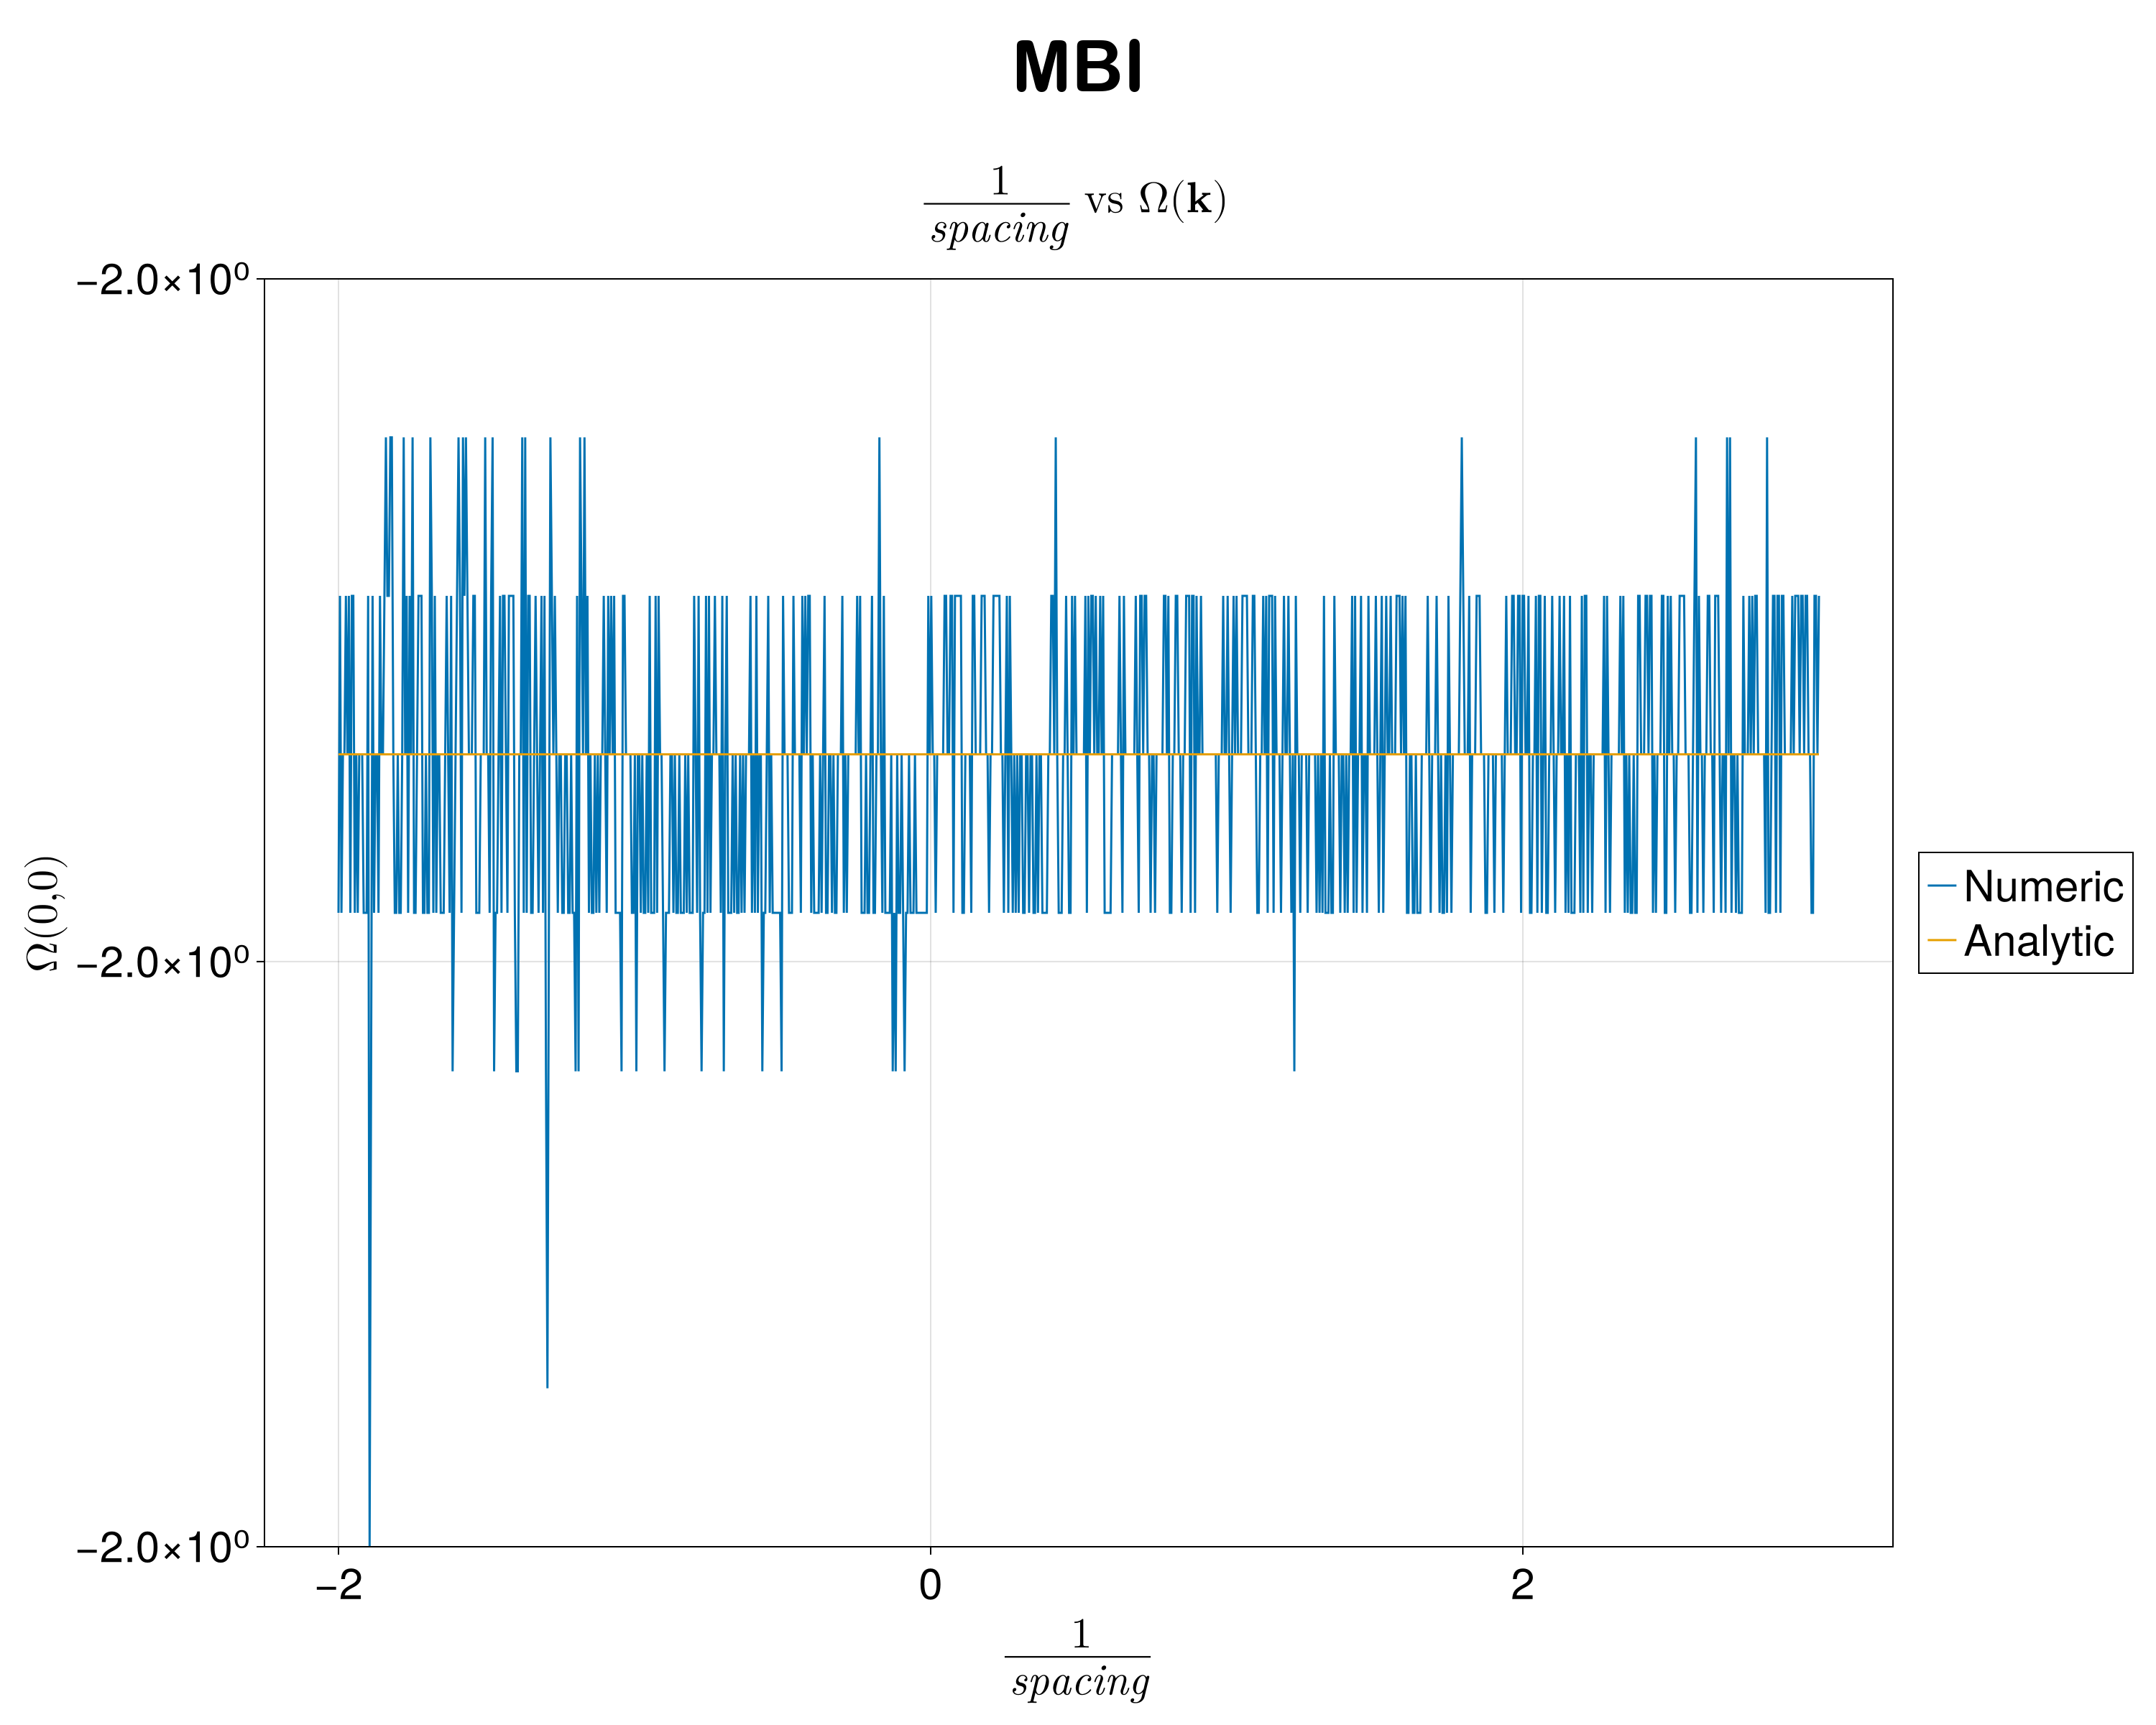

In [6]:
spacing_conv(w, pd, B)

<font size="12">3-Patch Spacing Convergence</font>

In [7]:
alpha = 100 * exp(im * pi/5)

80.90169943749474 + 58.778525229247315im

In [8]:
function patch_spacing_conv(w, pd, B, m_kappa, vF, delta, alpha)
    n_pts = 10^3
    spinor_labels = ["MBI"]
    geometric_quants = Array{Float64}(undef, length(spinor_labels), 3, n_pts)

    x = 10^(-16)
    y = 10^(-16)
    grid = reshape([x, y], (1, 2))
    P = Figure(size=(1500, 500 * length(spinor_labels)), fontsize=30, fonts = (; regular = "italic", weird = "bold"))

    spacings = Array{Float64}(undef, length(spinor_labels), n_pts)
    spacings[1, :] = range(0, 3, n_pts)

    exps = Array{Float64}(undef, length(spinor_labels), n_pts)
    for j in 1:length(spinor_labels)
        exps[j, :] = 10 .^spacings[j, :]
    end

    for i in 1:n_pts
        spacing = (w / 2 / pd) / exps[1, i]
        geometric_quants[1, 1, i] = mbi_patch_bc(grid, spacing, B, m_kappa, vF, delta, alpha)[1]
    end

    for j in 1:length(spinor_labels)
        major_ax1 = Axis(P[:, j], title = spinor_labels[j], titlegap = 120, titlefont = :weird, titlesize = 50)
        hidedecorations!(major_ax1, label = false)
        hidespines!(major_ax1)

        ax1 = Axis(P[1, j], xlabel = L"\frac{1}{spacing}", ylabel = L"\Omega(0, 0)", title = L"\frac{1}{spacing} \text{ vs } \Omega (\textbf{k})", 
        titlefont = :regular, titlegap = 20)
        lines!(ax1, spacings[j, :], geometric_quants[j, 1, :])
    end
    P
end

patch_spacing_conv (generic function with 1 method)

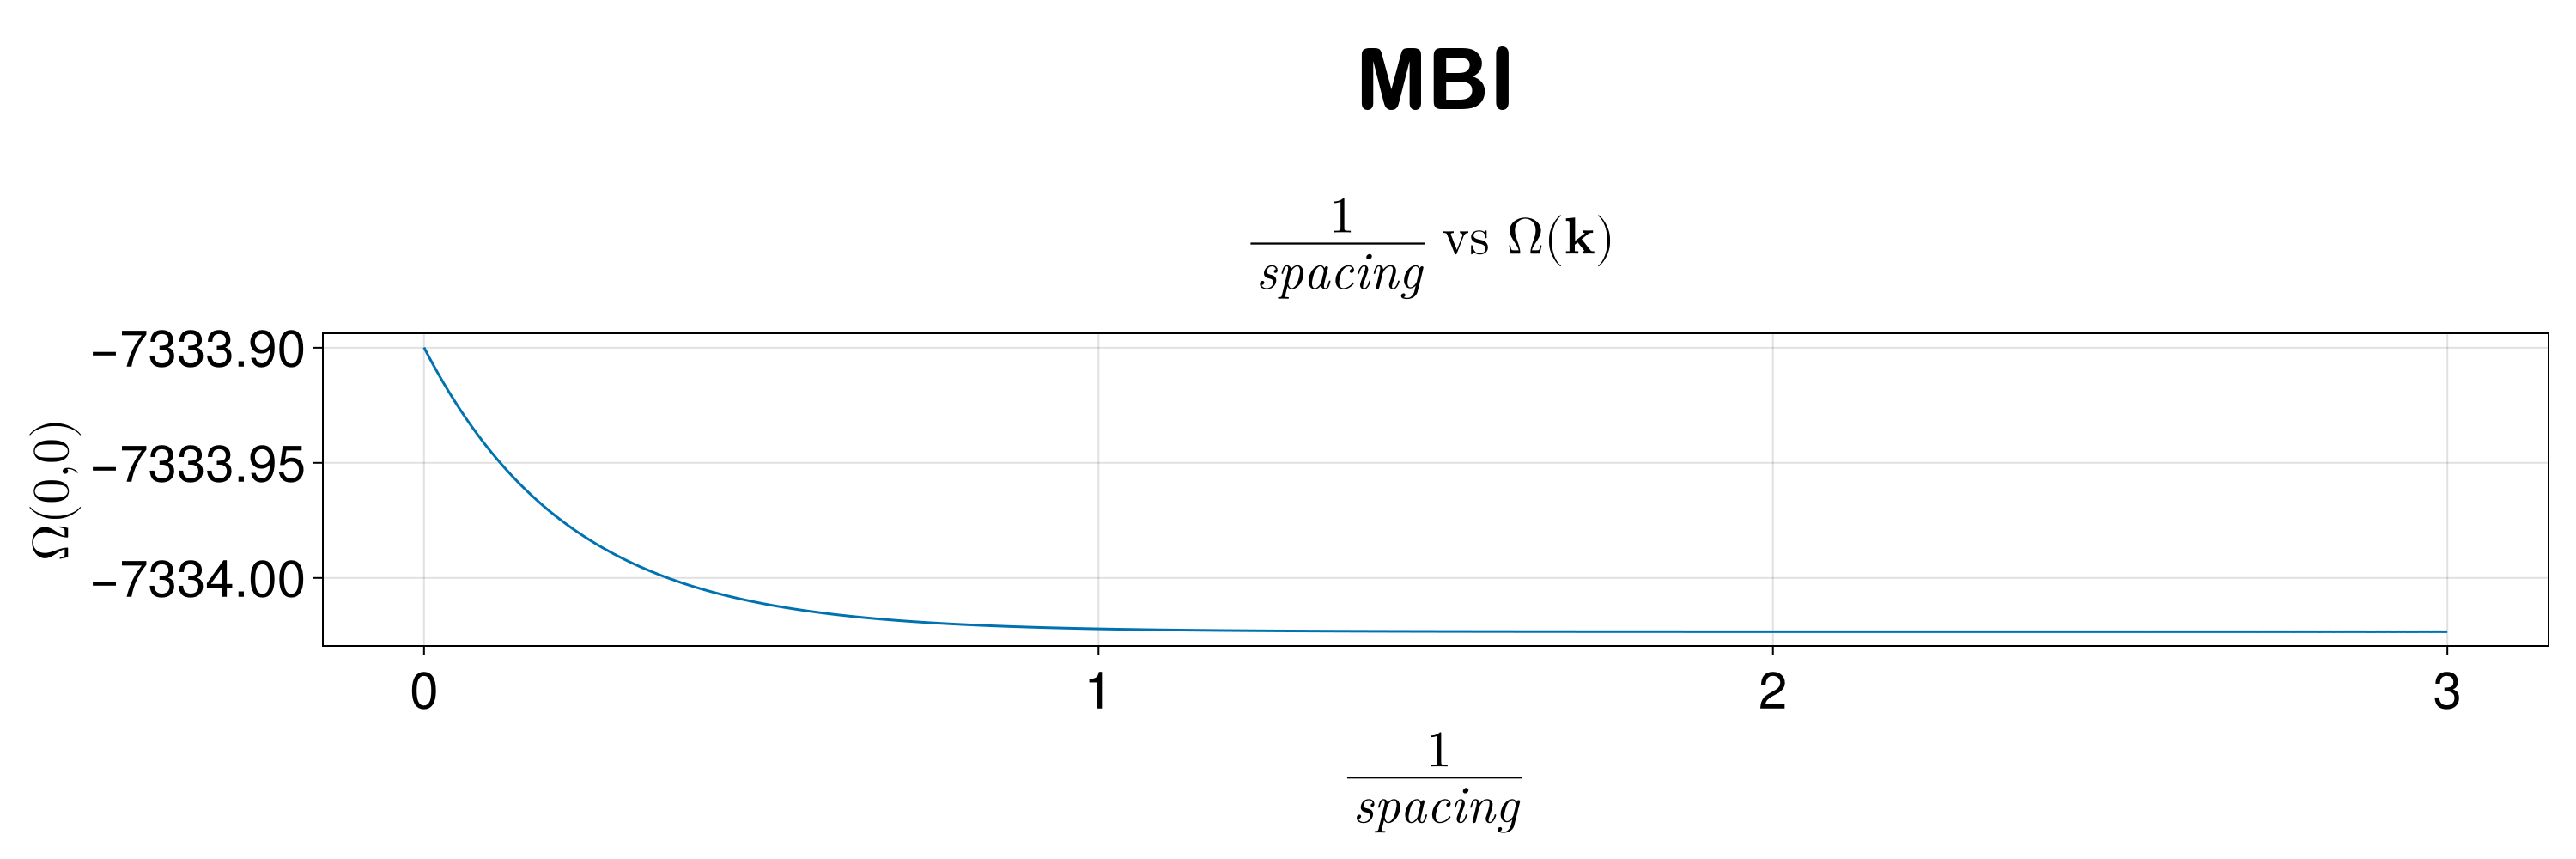

In [9]:
patch_spacing_conv(w, pd, B, m_kappa, vF, delta, alpha)

<font size="12">3-Patch numeric vs analytic</font>

In [10]:
function num_anal_comp(B, vF, delta, w, pd)
    alpha_ang_list = exp.(im * range(-pi, pi, 10^3))
    alpha_mag_list = range(0, 2, 10^3)

    angles = exp.(im * [-2*pi/3, -pi/7, pi/7, 2*pi/3])
    magnitudes = rand(10^minimum(alpha_mag_list):10^maximum(alpha_mag_list), 4)

    angle_curvatures = Array{Float64}(undef, length(magnitudes), length(alpha_ang_list))
    mag_curvatures = Array{Float64}(undef, length(angles), length(alpha_mag_list))

    # Origin parameters
    x = 10^(-16)
    y = 10^(-16)
    grid = reshape([x, y], (1, 2))
    spacing = 10^(-2) * (w / 2 / pd)
    

    # create plot
    P = Figure(size=(3500, 2000), fontsize=30, fonts = (; regular = "italic", weird = "bold"))

    for i in 1:length(angles)
        for j in 1:length(alpha_mag_list)
            alpha = 10^alpha_mag_list[j] * angles[i]
            num_bc = mbi_patch_bc(grid, spacing, B, m_kappa, vF, delta, alpha)[1]
            anal_bc = mbi_analytic_origin_3pbc(B, m_kappa, alpha, delta)
            mag_curvatures[i, j] = abs((anal_bc - num_bc) / anal_bc)
        end
        ax1 = Axis(P[i, 1], xlabel = L"log_{10}|\alpha|", ylabel = L"\Omega(0, 0)", title = string(angle.(angles[i])/pi), titlefont = :regular, titlegap = 20)
        lines!(ax1, alpha_mag_list, mag_curvatures[i, :])
    end

    for i in 1:length(magnitudes)
        for j in 1:length(alpha_ang_list)
            alpha = alpha_ang_list[j] * magnitudes[i]
            num_bc = mbi_patch_bc(grid, spacing, B, m_kappa, vF, delta, alpha)[1]
            anal_bc = mbi_analytic_origin_3pbc(B, m_kappa, alpha, delta)
            angle_curvatures[i, j] = abs((anal_bc - num_bc) / anal_bc)
        end
        ax1 = Axis(P[i, 2], xlabel = L"arg(\alpha)", ylabel = L"\Omega(0, 0)", title = string(magnitudes[i]), titlefont = :regular, titlegap = 20)
        lines!(ax1, angle.(alpha_ang_list), angle_curvatures[i, :])
    end

    major_ax1 = Axis(P[:, 1], title = L"\Delta \Omega(0,0) \text{ as a function of } |\alpha|", titlegap = 100, titlefont = :weird, titlesize = 50)
    hidedecorations!(major_ax1, label = false)
    hidespines!(major_ax1)

    major_ax2 = Axis(P[:, 2], title = L"\Delta \Omega(0,0) \text{ as a function of } arg(\alpha)", titlegap = 100, titlefont = :weird, titlesize = 50)
    hidedecorations!(major_ax2, label = false)
    hidespines!(major_ax2)

    big_ax = Axis(P[:, :], title = "Relative error between numeric 3P BC and analytic 3P BC at (0,0)", titlegap = 180, titlefont = :weird, titlesize = 80)
    hidedecorations!(big_ax, label = false)
    hidespines!(big_ax)
    
    P
end

num_anal_comp (generic function with 1 method)

In [11]:
# MBI parameters
B = -2

-2

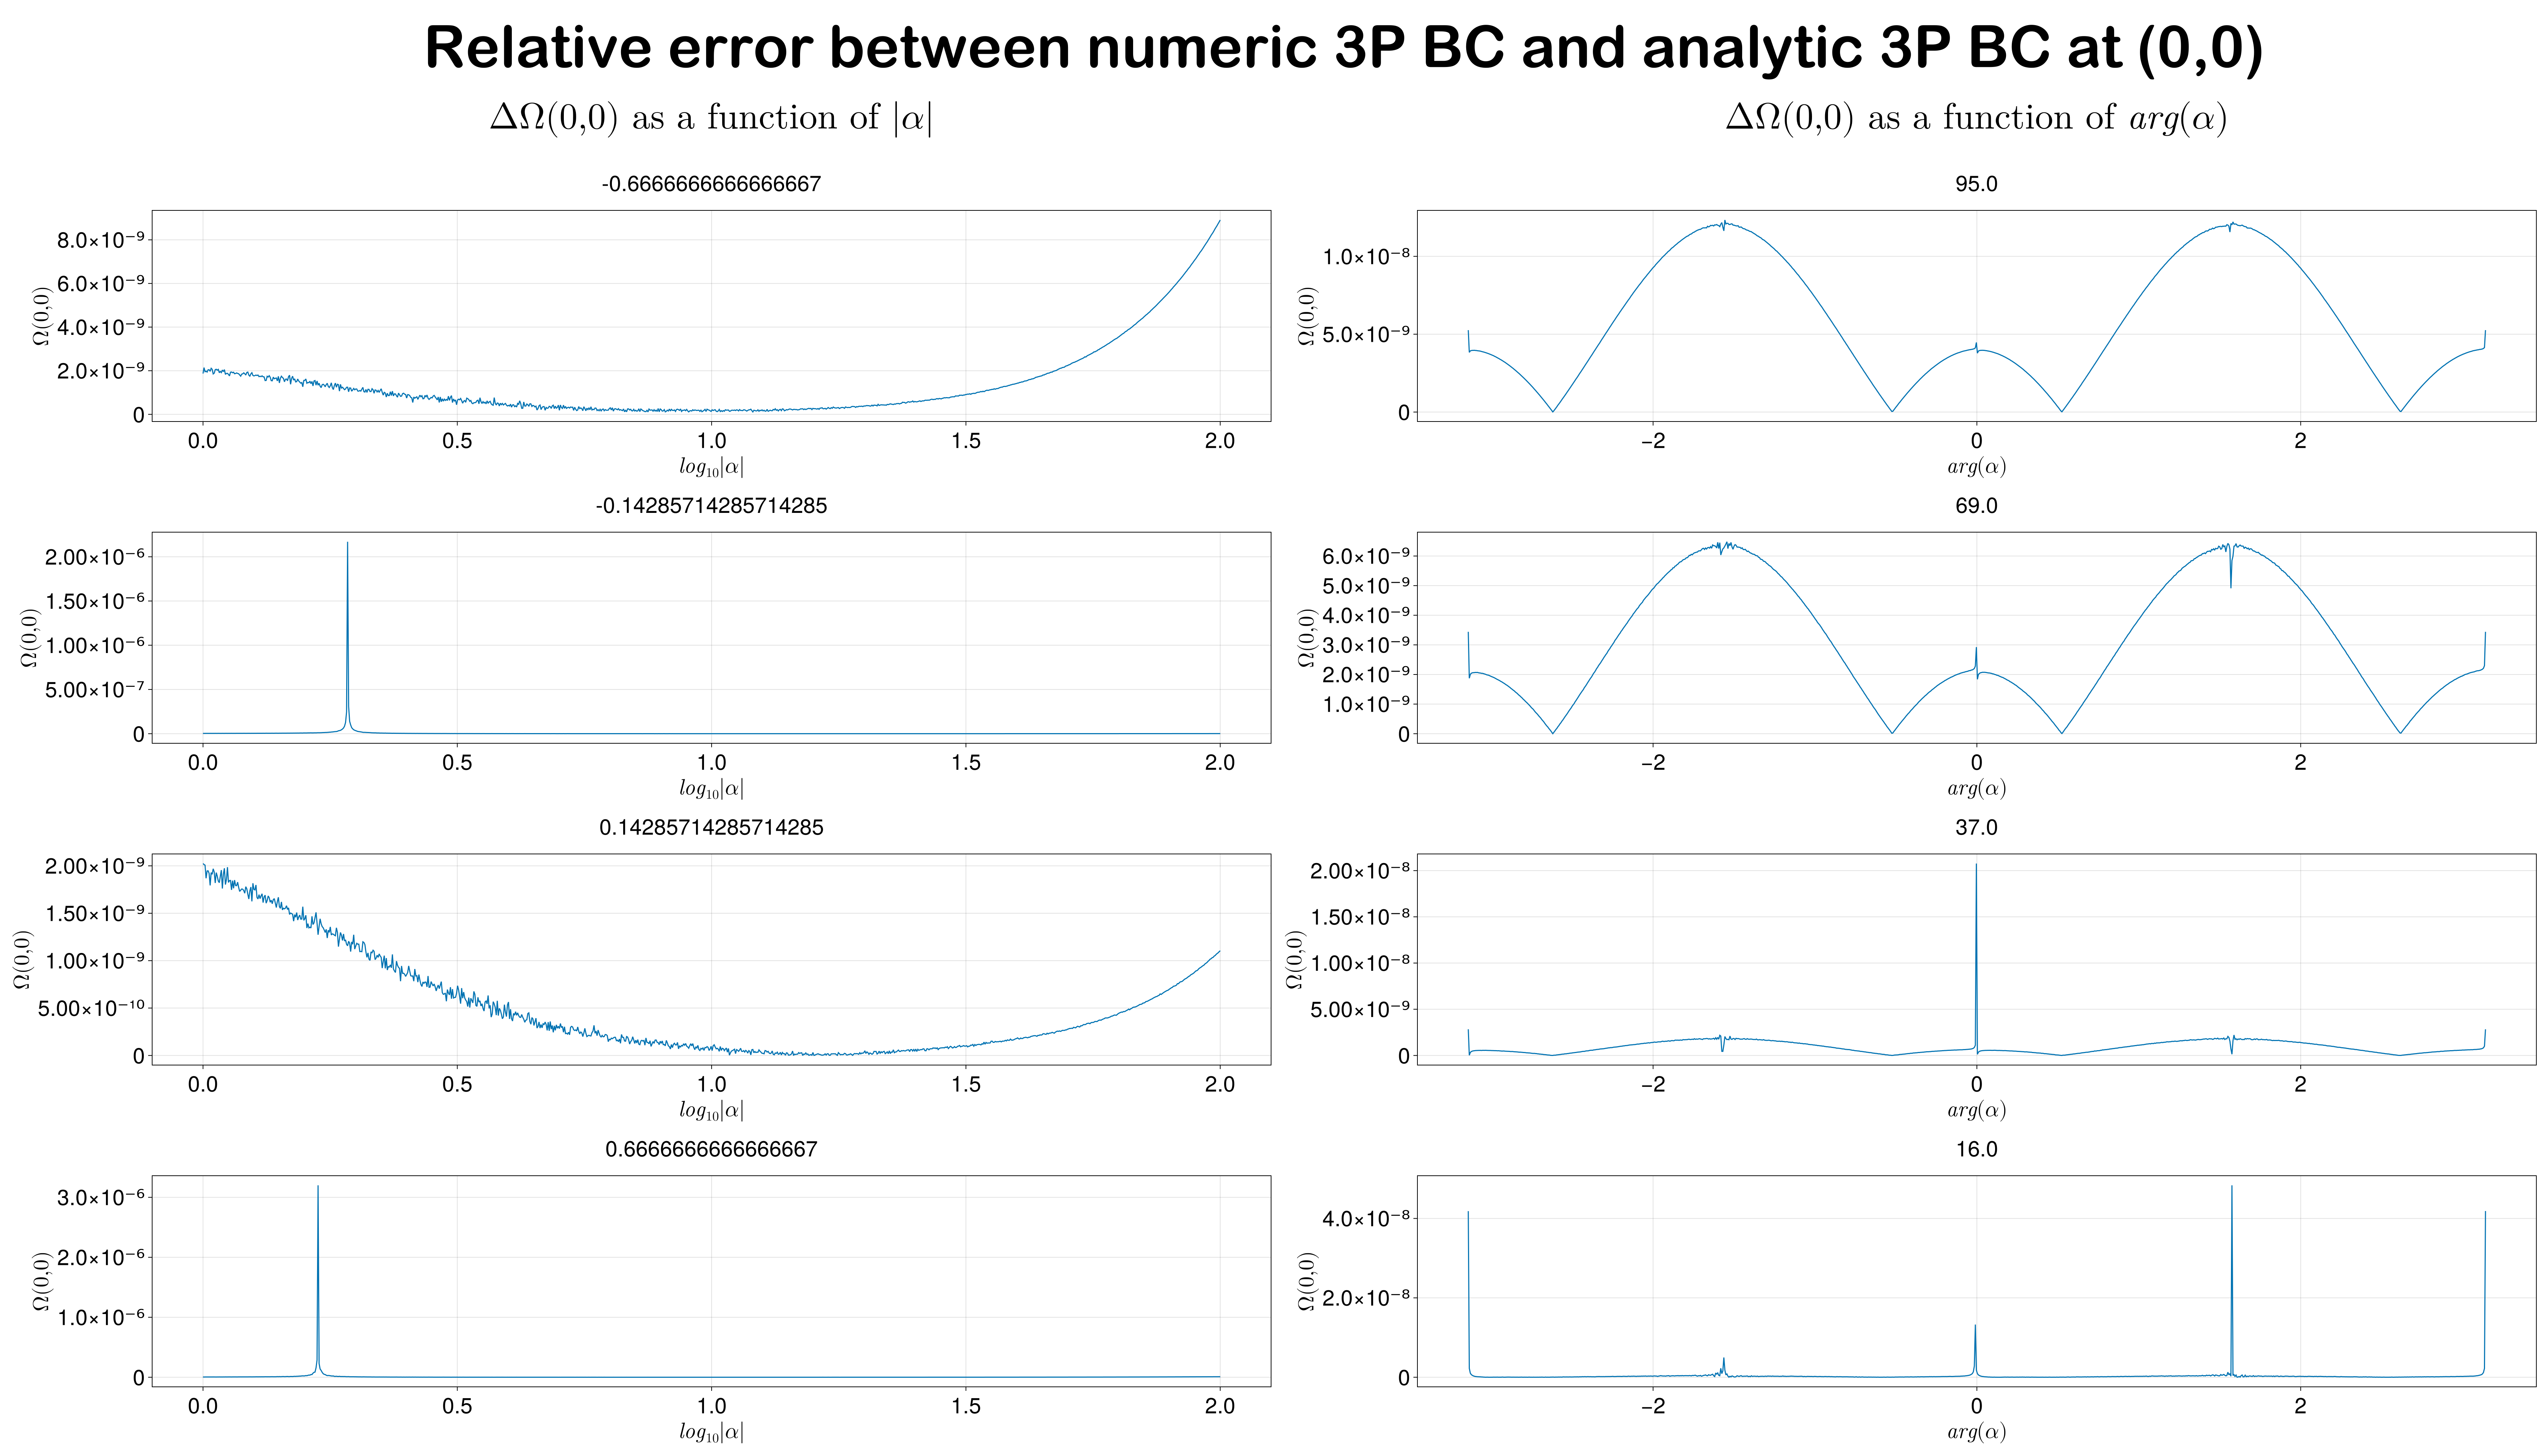

In [12]:
num_anal_comp(B, vF, delta, w, pd)

<font size="12">3P BC as a function of B</font>

In [13]:
delta = -1
vF = 0

0

In [14]:
function plot_alpha_m(m_kappa)
    n_pts = 10^3
    B_list = range(-10, 10, n_pts)
    alpha_list = Array{ComplexF64}(undef, n_pts)
    for i in 1:n_pts
        alpha_list[i] = mbi_alpha(m_kappa, B_list[i])
    end
    # create plot
    P = Figure(size=(1200, 600), fontsize=30, fonts = (; regular = "italic", weird = "bold"))
    ax1 = Axis(P[1, 1], xlabel = L"B", ylabel = L"Re(\alpha)", title =  L"B \text{ vs } Re(\alpha)", titlefont = :regular, titlegap = 20, titlesize = 30)
    lines!(ax1, B_list, real.(alpha_list))
    ax2 = Axis(P[1, 2], xlabel = L"B", ylabel = L"Im(\alpha)", title =  L"B \text{ vs } Im(\alpha)", titlefont = :regular, titlegap = 20, titlesize = 30)
    lines!(ax2, B_list, imag.(alpha_list))

    P
end


plot_alpha_m (generic function with 1 method)

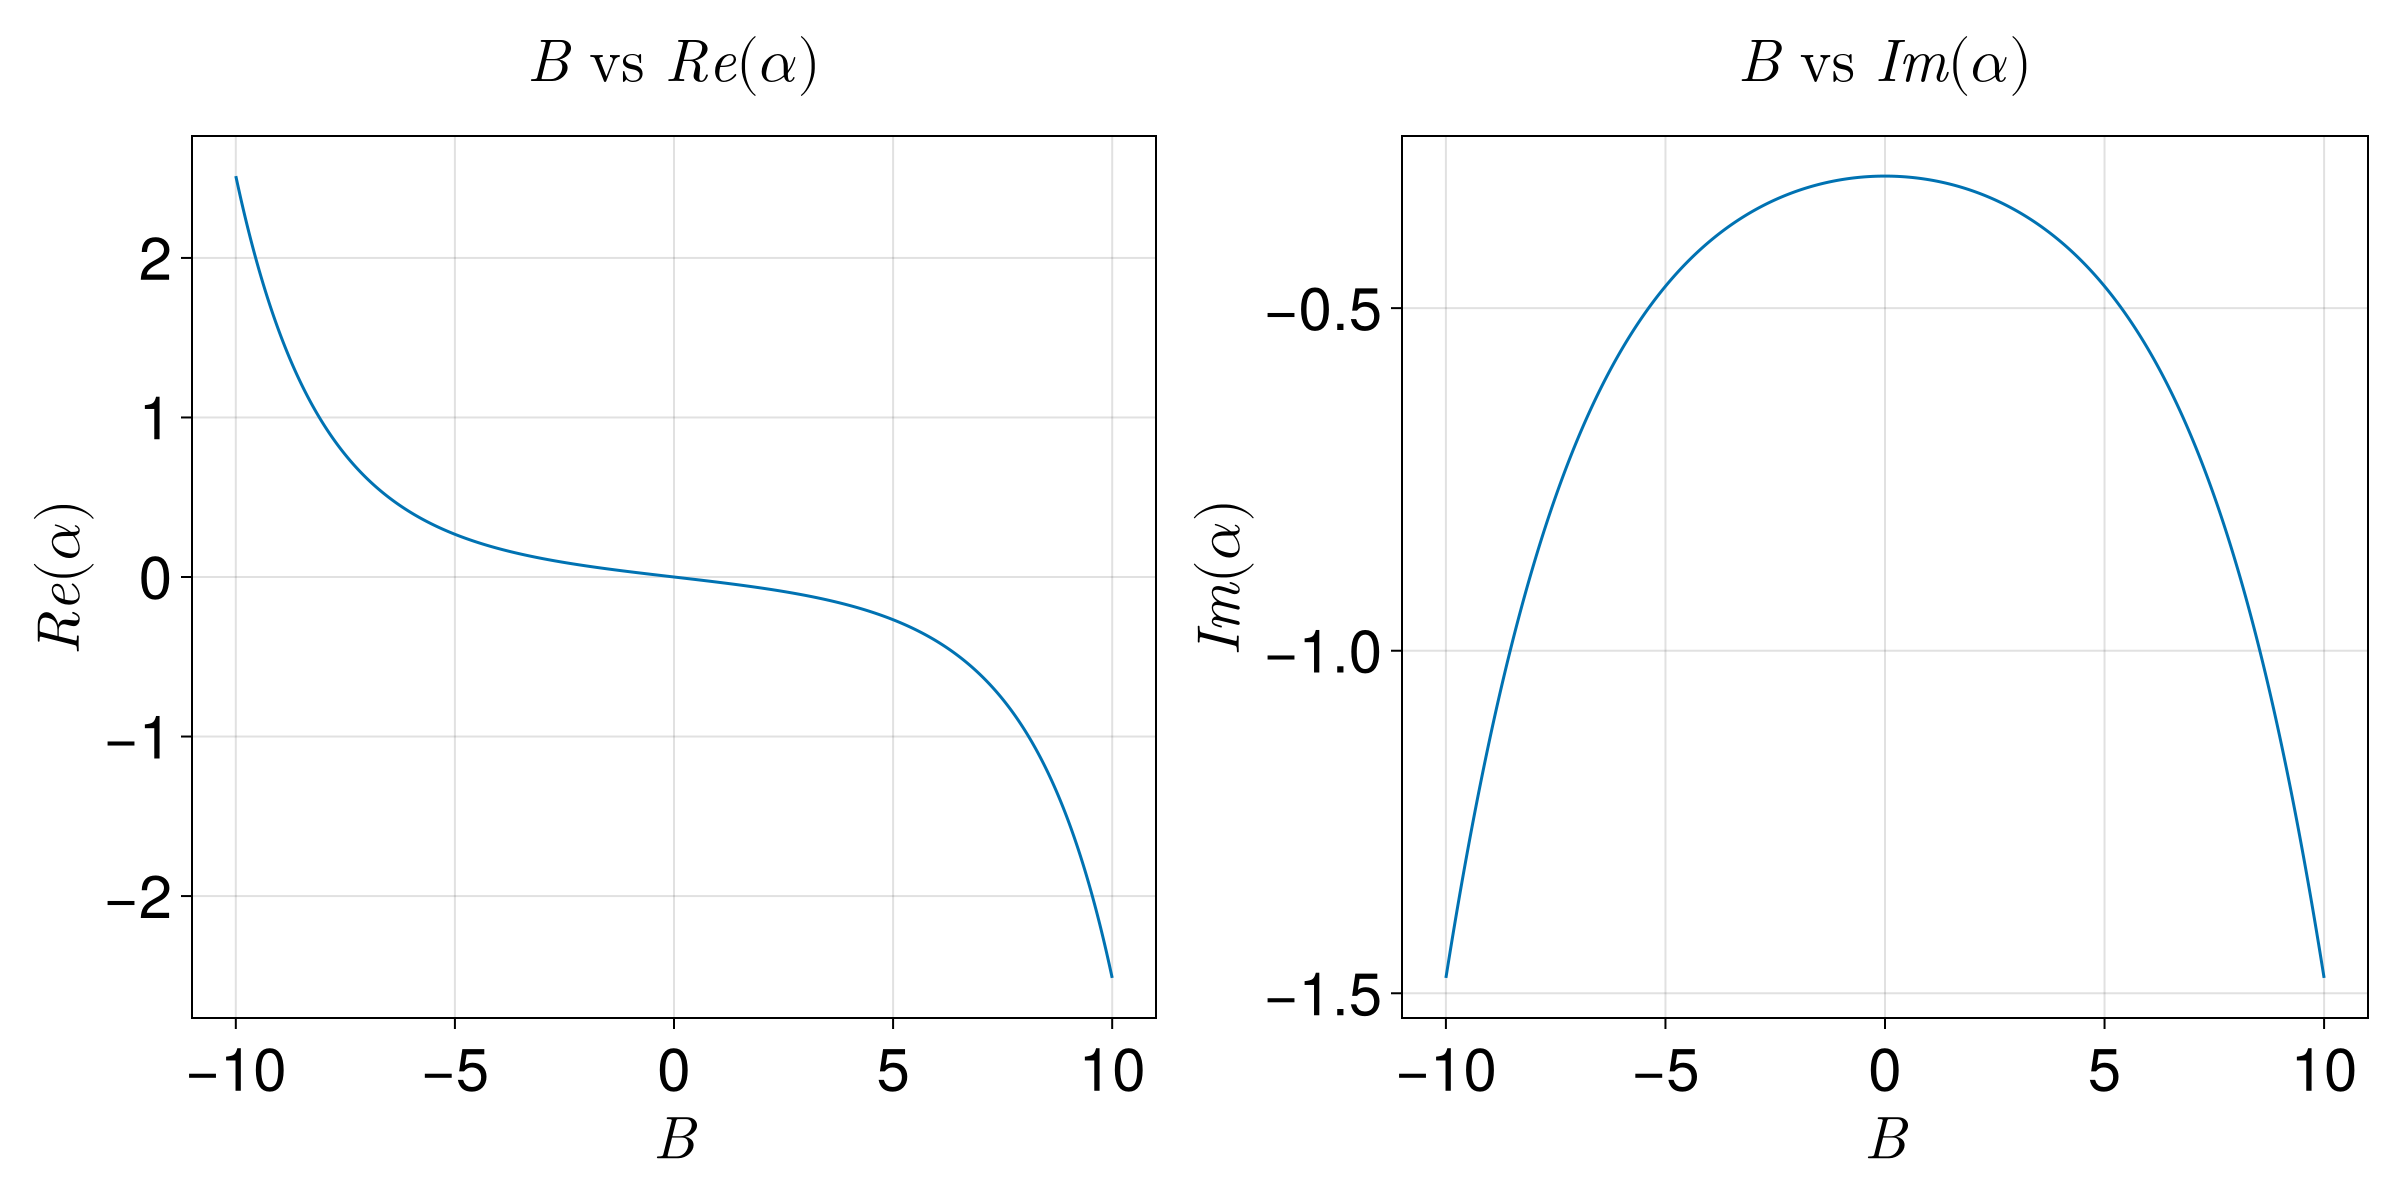

In [15]:
plot_alpha_m(m_kappa)

In [16]:
function mbi_bc_B(vF, delta, w, pd)
    n_pts = 10^3
    B_list = range(-15, 15, n_pts)

    curvatures = Array{Float64}(undef, n_pts)

    weighted_sum = Array{Float64}(undef, n_pts)

    kappa_1 = m_kappa * [1, 0]
    kappa_3 = m_kappa * [cos(2*pi/3), sin(2*pi/3)]
    kappa_5 = m_kappa * [cos(4*pi/3), sin(4*pi/3)]
    # create plot
    P = Figure(size=(1200, 1000), fontsize=30, fonts = (; regular = "italic", weird = "bold"))

    for i in 1:n_pts
        B = B_list[i]
        alpha = mbi_alpha(m_kappa, B)
        curvatures[i] = mbi_analytic_origin_3pbc(B, m_kappa, alpha, delta)
        weighted_sum[i] = mbi_analytic_bc(B)
    end
    ax1 = Axis(P[1, 1], xlabel = L"B", ylabel = L"\Omega(0, 0)", title =  L"B \text{ vs } \Omega(0, 0)", titlefont = :regular, titlegap = 20, titlesize = 30)
    lines!(ax1, B_list, curvatures, label = "3-Patch BC")
    lines!(ax1, B_list, weighted_sum, label = "Weighted Sum")
    P[1, 2] = Legend(P, ax1, framevisible = true)

    P
end

mbi_bc_B (generic function with 1 method)

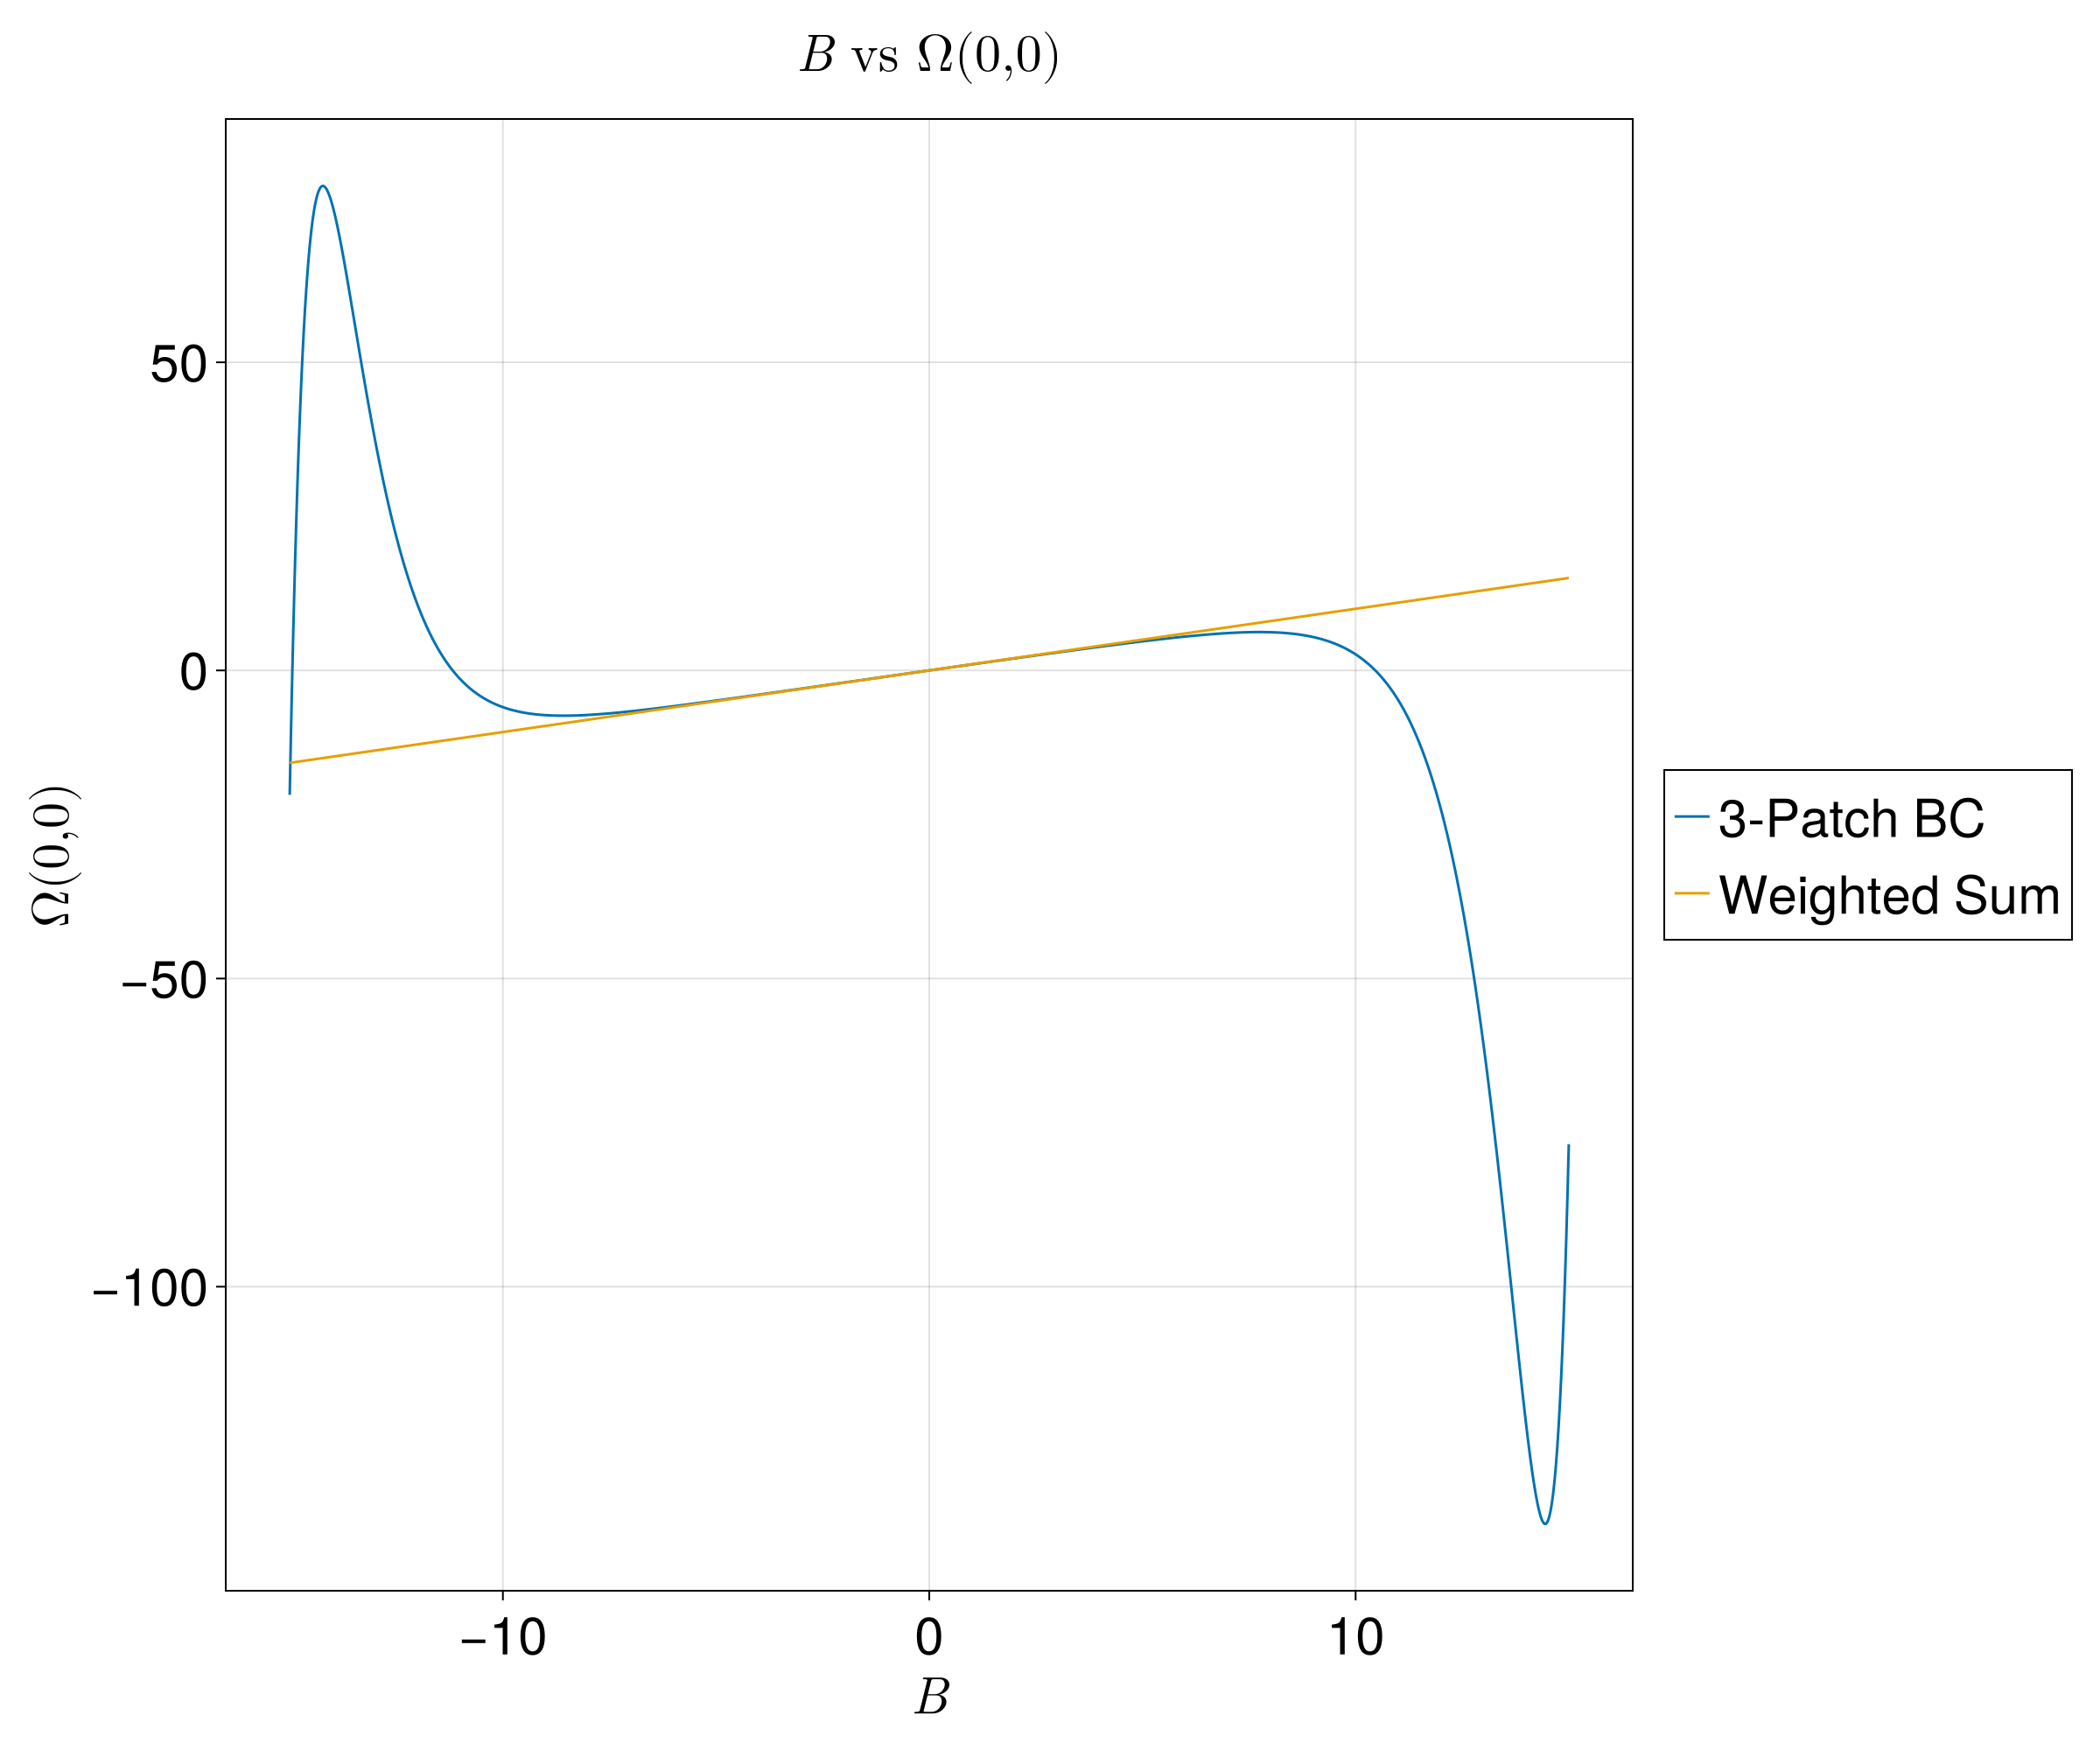

In [17]:
mbi_bc_B(vF, delta, w, pd)